In [13]:
#from typing import Dict, Tuple, List
#from pathlib import Path
#
#import numpy as np
#import pandas as pd

#from numpy.testing import assert_equal, assert_allclose
from typing import Dict, Tuple, List
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy.testing import assert_equal, assert_allclose
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
#does intensity affect time to sleep and time slept?

In [52]:
#pd.read_csv("data/babynames/names2000_2021.csv", index_col=0)
minuteCaloriesNarrow = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minuteIntensitiesNarrow = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minuteSleep = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
sleepday = pd.read_csv("Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
dailyCalories = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyActivity = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyIntensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
weightLog = pd.read_csv("Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

# Factors affecting time to fall asleep and time slept?

Investigate whether the amount of calories burnt or active minutes affect the time required to fall asleep and time slept.
## i) Calories 

In [43]:
#does daily calories affect time required to fall asleep?
#function merging dailyCalories and sleepday datasets
def merge_dailyCal_sleepDay(dailyCalories: pd.DataFrame, sleepday: pd.DataFrame): 
    sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])
    sleepday["Date"] = sleepday["SleepDay"].dt.strftime("%-m/%-d/%Y")
    df = pd.merge(sleepday,dailyCalories,left_on = ["Id","Date"],right_on = ["Id","ActivityDay"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    return df

In [44]:
merge_dailyCal_sleepDay(dailyCalories, sleepday)

/var/folders/b8/k1shsjk53yg7j39tjbpltkzc0000gn/T/ipykernel_10542/2691997458.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,ActivityDay,Calories,TimeToFallAsleep
0,1503960366,2016-04-12,1,327,346,4/12/2016,4/12/2016,1985,19
1,1503960366,2016-04-13,2,384,407,4/13/2016,4/13/2016,1797,23
2,1503960366,2016-04-15,1,412,442,4/15/2016,4/15/2016,1745,30
3,1503960366,2016-04-16,2,340,367,4/16/2016,4/16/2016,1863,27
4,1503960366,2016-04-17,1,700,712,4/17/2016,4/17/2016,1728,12
...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360,4/30/2016,4/30/2016,2896,17
409,8792009665,2016-05-01,1,503,527,5/1/2016,5/1/2016,1962,24
410,8792009665,2016-05-02,1,415,423,5/2/2016,5/2/2016,2015,8
411,8792009665,2016-05-03,1,516,545,5/3/2016,5/3/2016,2297,29


In [45]:
def visualize_data(df):
    # Line plot of calories vs. time to fall asleep
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Calories', y='TimeToFallAsleep')
    plt.title('Daily Calories vs. Time to Fall Asleep')
    plt.xlabel('Calories')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()
    
    # Bar chart of calories vs. time to fall asleep
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Calories', y='TimeToFallAsleep')
    plt.title('Daily Calories vs. Time to Fall Asleep')
    plt.xlabel('Calories')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()
    
    # Scatter plot and regression line
    plt.figure(figsize=(12, 6))
    sns.regplot(data=df, x='Calories', y='TimeToFallAsleep', scatter_kws={'alpha':0.5})
    plt.title('Regression Analysis: Calories vs. Time to Fall Asleep')
    plt.xlabel('Calories')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()
    
    # Regression analysis
    X = df['Calories'].values.reshape(-1, 1)
    y = df['TimeToFallAsleep'].values
    regression = LinearRegression()
    regression.fit(X, y)
    y_pred = regression.predict(X)
    
    print('Regression Coefficient:', regression.coef_)
    print('Intercept:', regression.intercept_)
    print('R^2 score:', regression.score(X, y))


In [46]:
def plot_calorie_intervals_frequency(dailyCalories: pd.DataFrame):
    # Define the calorie intervals
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
    labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', 
              '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000']
    
    # Categorize the 'Calories' into intervals
    dailyCalories['CalorieInterval'] = pd.cut(dailyCalories['Calories'], bins=bins, labels=labels, right=False)
    
    # Create a bar chart of the frequency of each interval
    plt.figure(figsize=(10, 6))
    bar_plot = sns.countplot(data=dailyCalories, x='CalorieInterval')
    plt.title('Frequency of Daily Calories in Different Intervals')
    plt.xlabel('Calorie Interval')
    plt.ylabel('Frequency')

    # Add total frequency labels on top of each bar
    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.annotate(f'{height}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 5), 
                          textcoords = 'offset points')

    plt.show()

def plot_calorie_intervals_avg_sleep(df: pd.DataFrame):
    # Define the calorie intervals
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
    labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', 
              '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000']
    
    # Categorize the 'Calories' into intervals
    df['CalorieInterval'] = pd.cut(df['Calories'], bins=bins, labels=labels, right=False)
    
    # Calculate the average time to fall asleep for each interval
    avg_sleep = df.groupby('CalorieInterval')['TimeToFallAsleep'].mean().reset_index()
    
    # Create a bar chart of the average time to fall asleep
    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_sleep, x='CalorieInterval', y='TimeToFallAsleep')
    plt.title('Average Time to Fall Asleep in Different Calorie Intervals')
    plt.xlabel('Calorie Interval')
    plt.ylabel('Average Time to Fall Asleep (minutes)')
    
    # Add average time labels on top of each bar
    for i in range(len(avg_sleep)):
        plt.text(i, avg_sleep['TimeToFallAsleep'][i] + 1, round(avg_sleep['TimeToFallAsleep'][i], 2), ha = 'center', va = 'bottom')

    plt.show()

def plot_box_calorie_intervals_avg_sleep(df: pd.DataFrame):
    # Define the calorie intervals
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
    labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', 
              '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000']
    
    # Categorize the 'Calories' into intervals
    df['CalorieInterval'] = pd.cut(df['Calories'], bins=bins, labels=labels, right=False)
    
    # Create a box plot for the average time to fall asleep in each interval
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='CalorieInterval', y='TimeToFallAsleep')
    plt.title('Box Plot of Time to Fall Asleep in Different Calorie Intervals')
    plt.xlabel('Calorie Interval')
    plt.ylabel('Time to Fall Asleep (minutes)')
    
    plt.show()


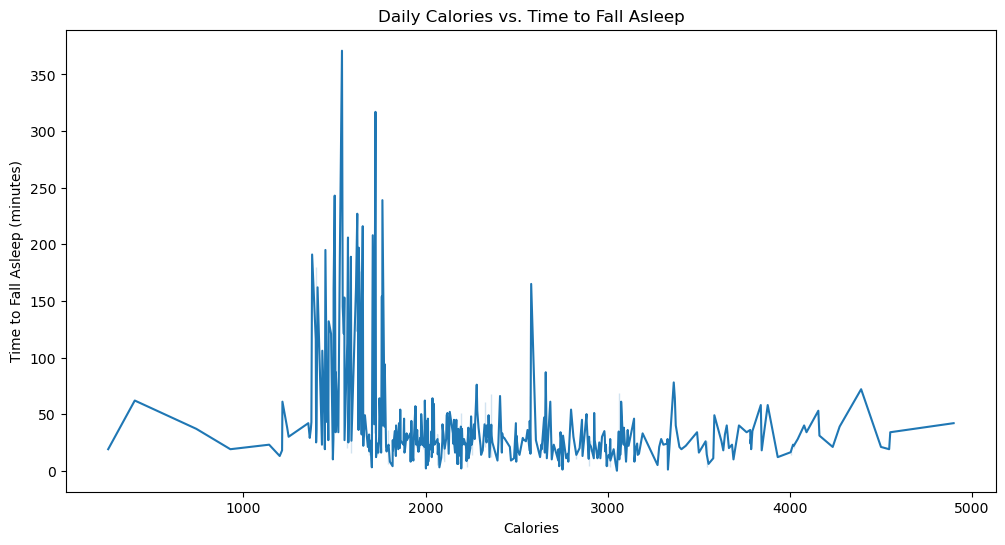

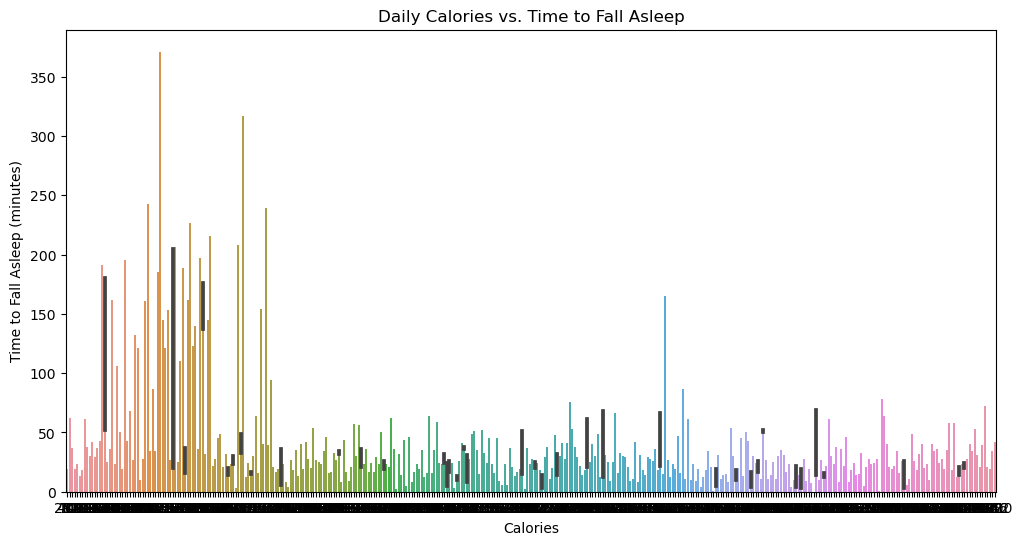

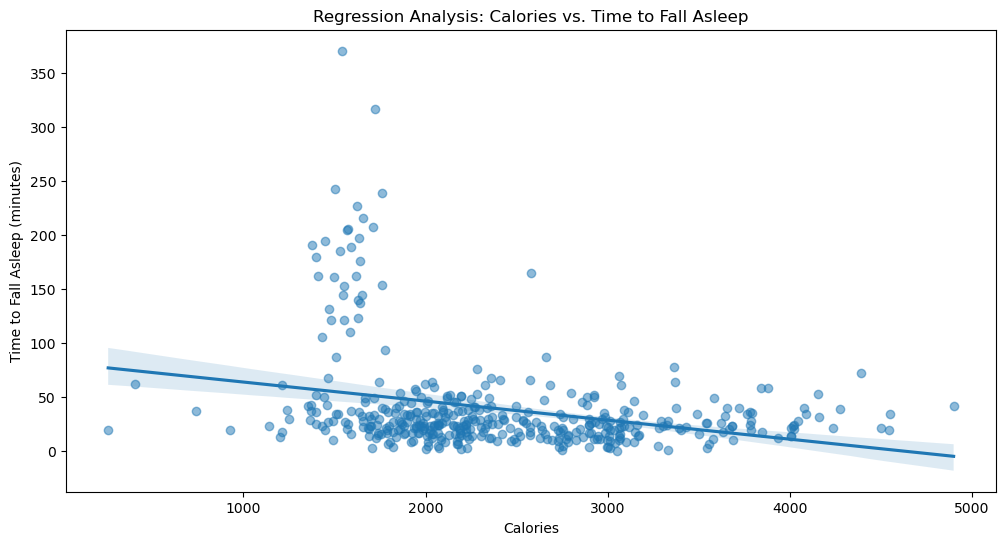

Regression Coefficient: [-0.01765138]
Intercept: 81.49240625201736
R^2 score: 0.08361089404548572


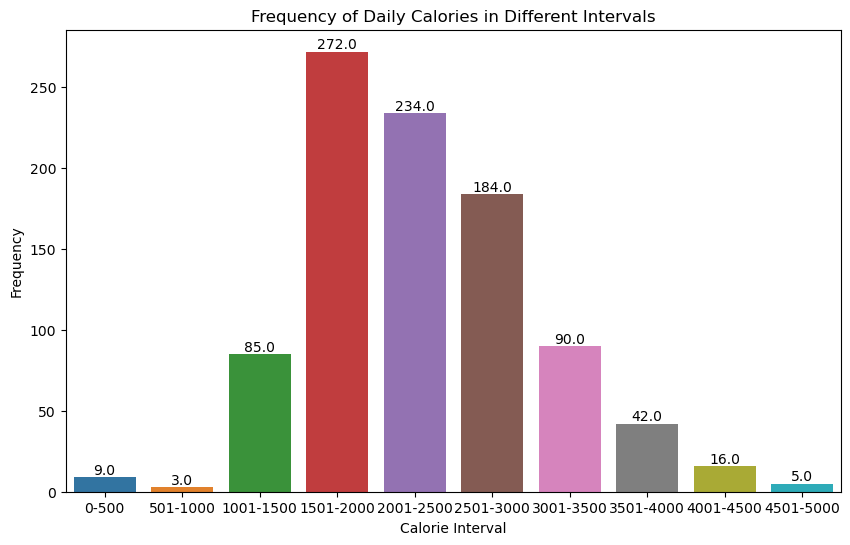

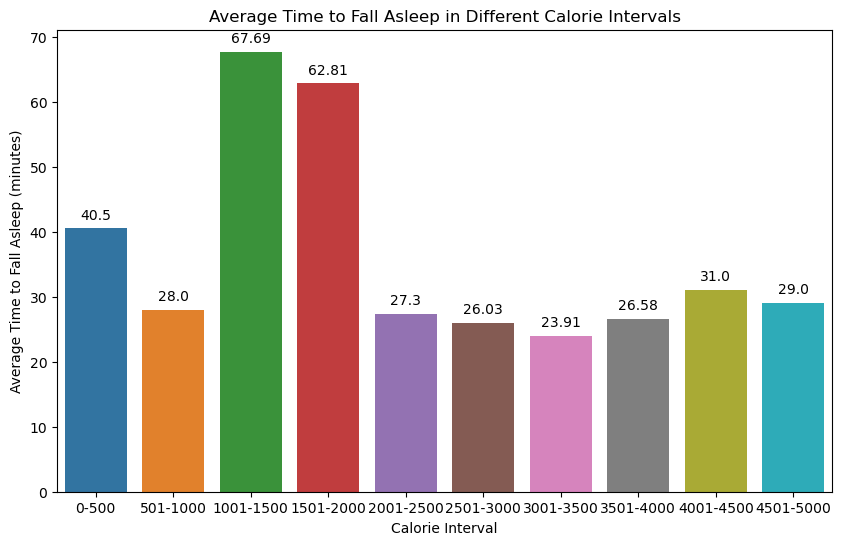

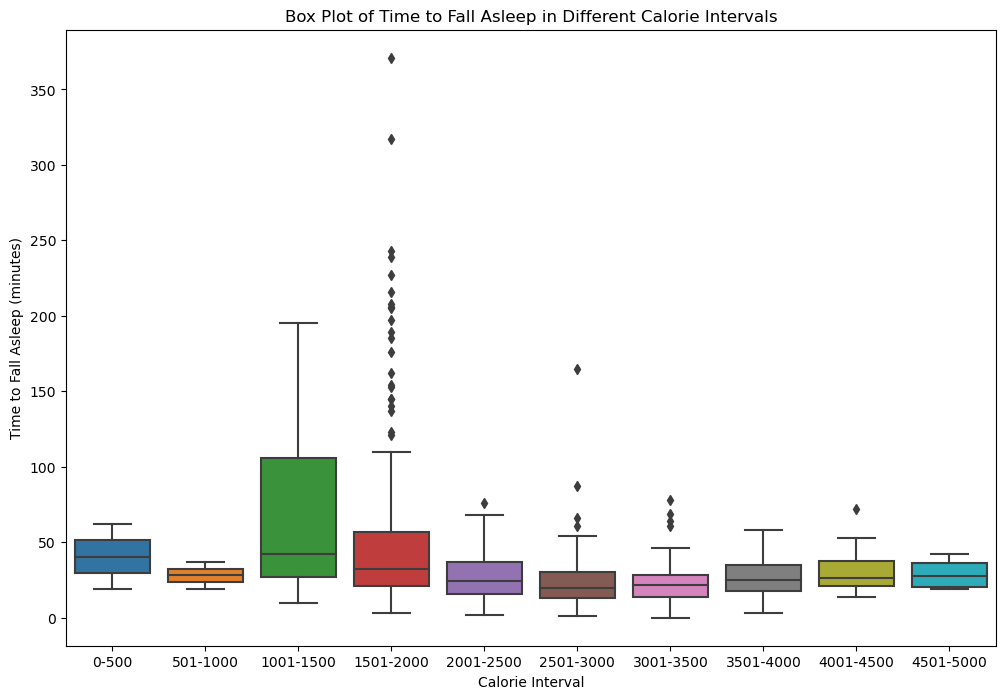

In [47]:
a = merge_dailyCal_sleepDay(dailyCalories, sleepday)
visualize_data(a)
plot_calorie_intervals_frequency(dailyCalories)
plot_calorie_intervals_avg_sleep(a)
plot_box_calorie_intervals_avg_sleep(a)


## ii) daily intensity 

In [48]:
#merge sleep day and daily intensities
def merge_dailyCal_sleepDay(dailyIntensities: pd.DataFrame, sleepday: pd.DataFrame): 
    sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])
    sleepday["Date"] = sleepday["SleepDay"].dt.strftime("%-m/%-d/%Y")
    df = pd.merge(sleepday,dailyIntensities,left_on = ["Id","Date"],right_on = ["Id","ActivityDay"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    return df

def plot_time_to_fall_asleep_vs_activity_minutes(df: pd.DataFrame):
    activity_columns = ["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]
    plt.figure(figsize=(14, 10))
    
    for i, activity in enumerate(activity_columns, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=activity, y="TimeToFallAsleep")
        plt.title(f'Time to Fall Asleep vs. {activity}')
        plt.xlabel(activity)
        plt.ylabel('Time to Fall Asleep (minutes)')
    
    plt.tight_layout()
    plt.show()
    
def plot_time_slept_vs_activity_minutes(df: pd.DataFrame):
    activity_columns = ["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]
    plt.figure(figsize=(14, 10))
    
    for i, activity in enumerate(activity_columns, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=activity, y="TotalMinutesAsleep",color=["red"])
        plt.title(f'Time Slept vs. {activity}')
        plt.xlabel(activity)
        plt.ylabel('Time Slept (minutes)')
    
    plt.tight_layout()
    plt.show()

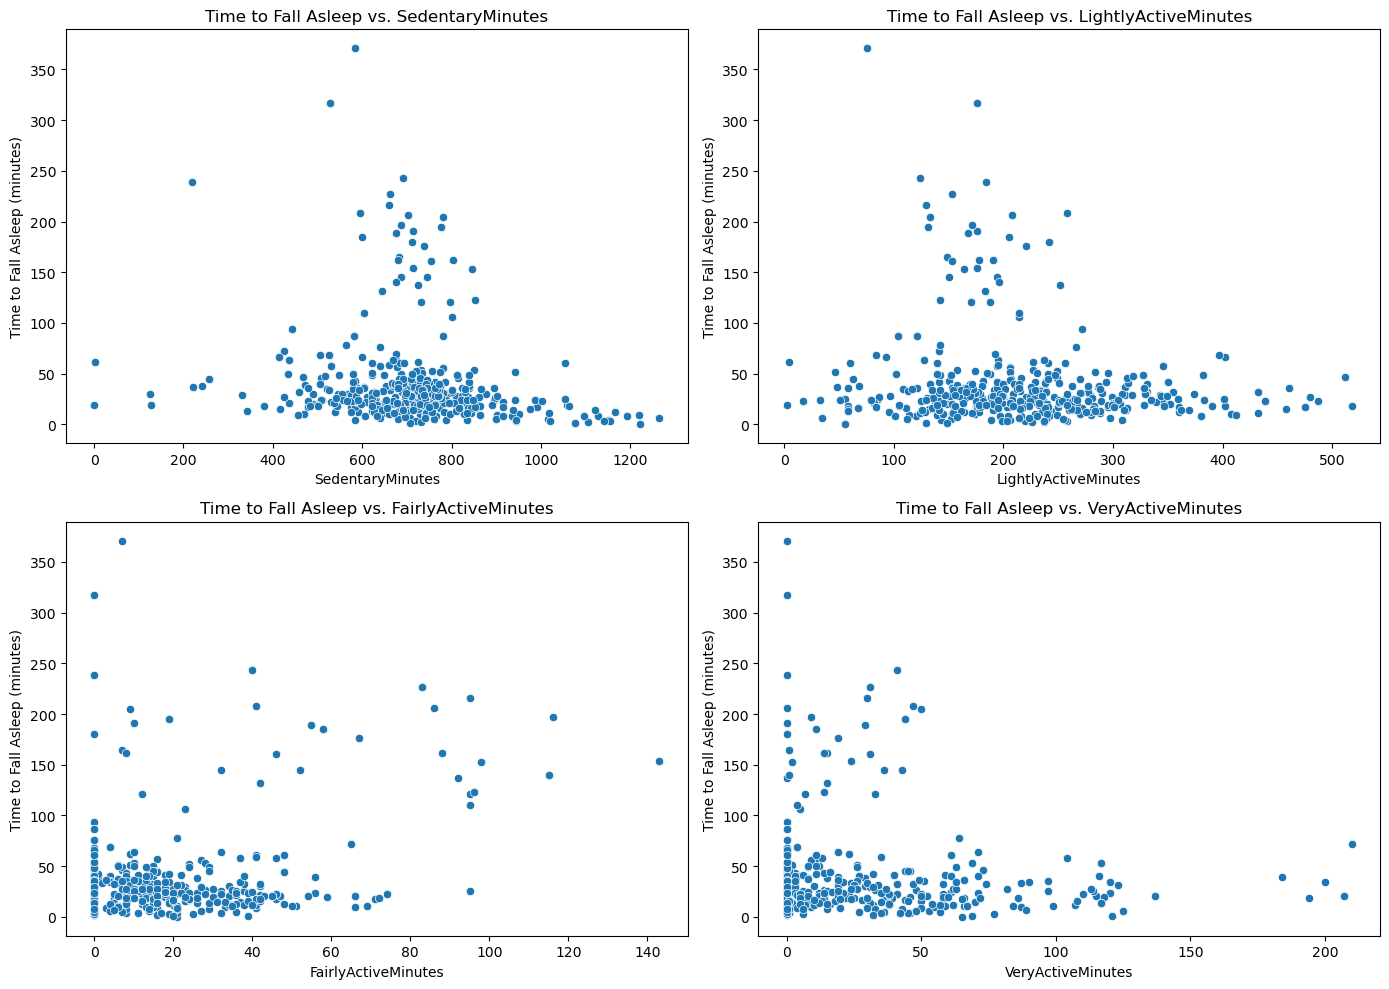

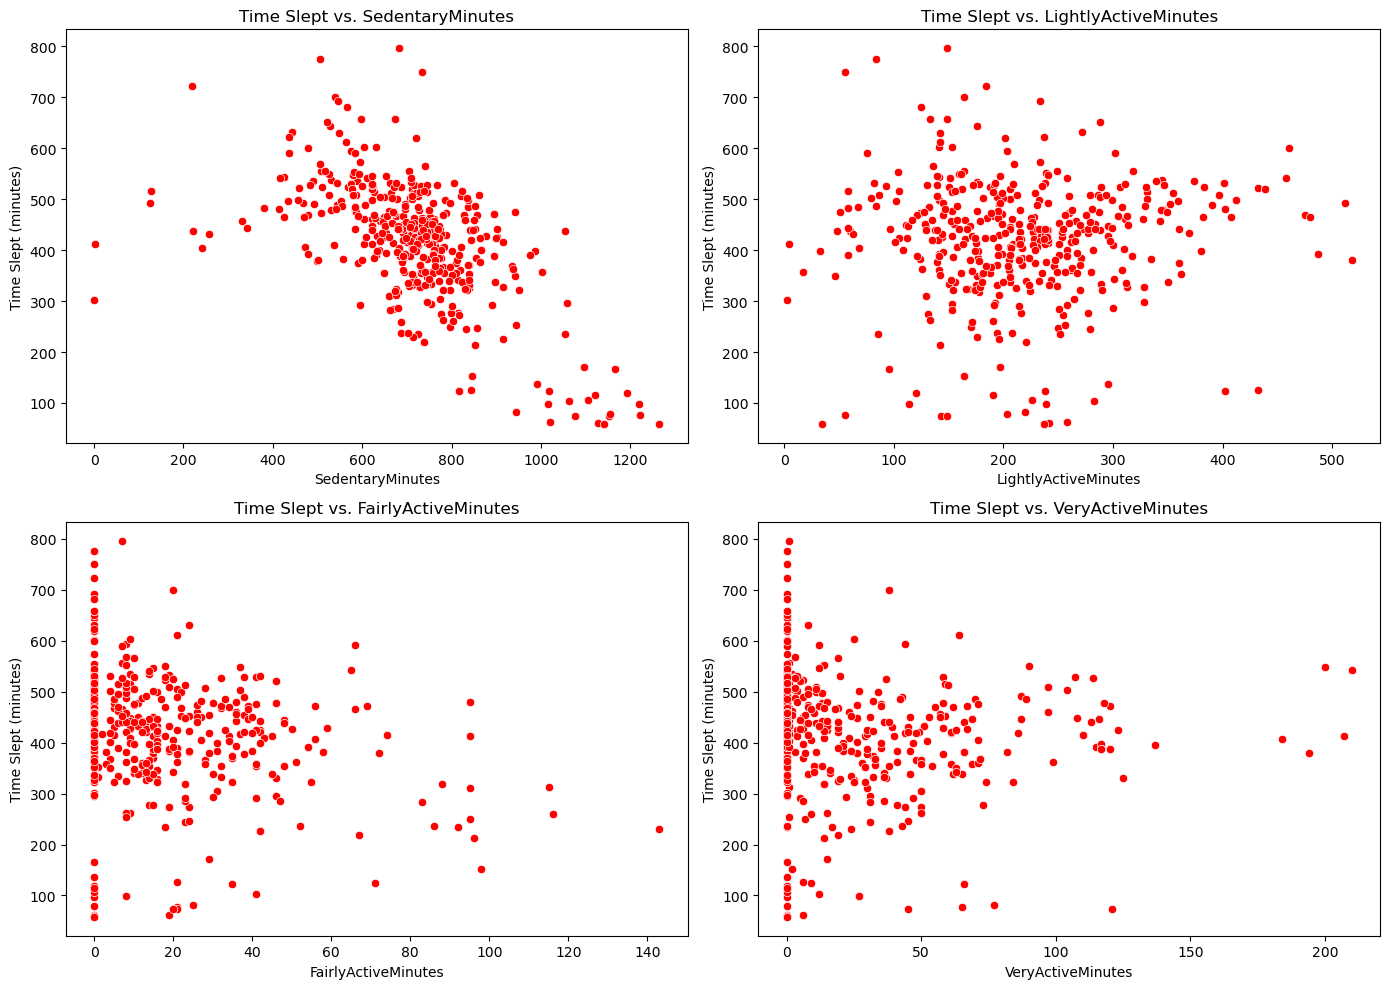

In [49]:
b=merge_dailyCal_sleepDay(dailyIntensities, sleepday)

plot_time_to_fall_asleep_vs_activity_minutes(b)
plot_time_slept_vs_activity_minutes(b)

## iii) BMI

In [62]:
def merge_bmi_sleepDay(weightLog: pd.DataFrame, sleepday: pd.DataFrame):
    weightLog["Date1"] = weightLog["Date"].str[0:9]
    sleepday["Date1"] = sleepday["SleepDay"].str[0:9]
    df = pd.merge(sleepday,weightLog,left_on = ["Id","Date1"],right_on = ["Id","Date1"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    return df

def plot_time_to_sleep_vs_bmi(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='BMI', y='TimeToFallAsleep')
    plt.title('Time to Fall Asleep vs. BMI')
    plt.xlabel('BMI')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()


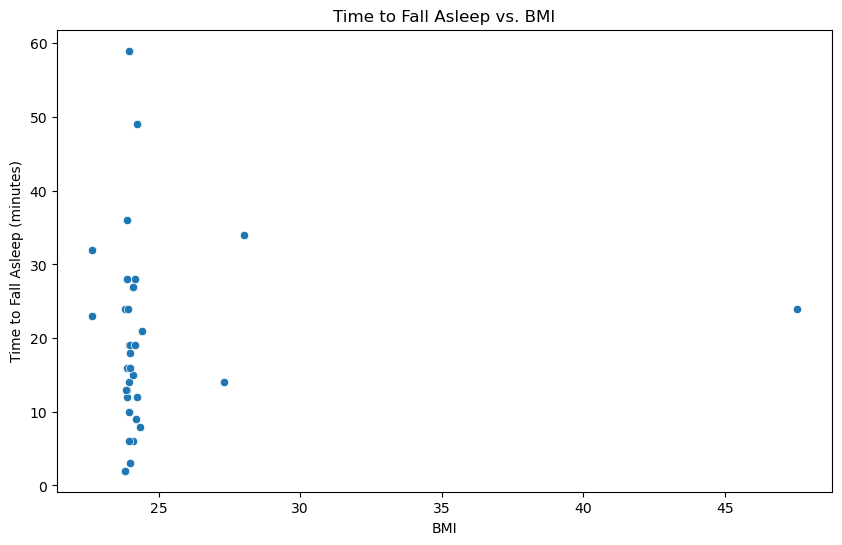

In [63]:
c = merge_dailyCal_sleepDay(weightLog,sleepday)
plot_time_to_sleep_vs_bmi(c)

In [ ]:
#find top 15 persons with highest BMI on average and look at their BMI, average activity, average Calorie
#do the same for everything but also for total time slept
#list bmi for their corresponding last record